<a href="https://colab.research.google.com/github/SonalikaSingh/Bank_customer_churning/blob/main/Bank_customer_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("Churn_Modelling.csv")
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4510,4511,15657747,Zito,611,Germany,Female,43,9,127216.31,2,0,1,17913.25,0
178,179,15762615,Campbell,597,Spain,Female,40,8,101993.12,1,0,1,94774.12,0
1206,1207,15599268,Yobachi,584,Spain,Male,32,5,0.00,2,1,0,10956.82,0
9692,9693,15693690,Iweobiegbunam,574,Spain,Male,52,7,115532.52,1,1,0,196257.67,0
6342,6343,15704340,Fu,581,France,Female,37,10,104255.03,1,1,0,86609.37,0


In [3]:
df.drop(['RowNumber','CustomerId','Surname'],axis='columns',inplace=True)

We can use seaborn to create a simple heatmap to see where data is missing

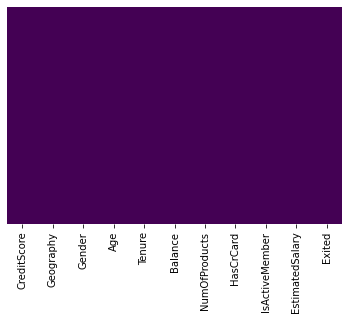

In [4]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [5]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

Changing datatype of gender to int

In [6]:
df['Gender'].replace({'Female':1,'Male':0},inplace=True)

Dummy variables to convert geography object into int

In [7]:
x=pd.get_dummies(df.Geography)

In [8]:
#Concatenation in pandas to join two dataframes
merged=pd.concat([df,x],axis='columns')

In [9]:
#Dropping original geography column
final=merged.drop('Geography',axis='columns')

In [10]:
final.head(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,1,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,0,1


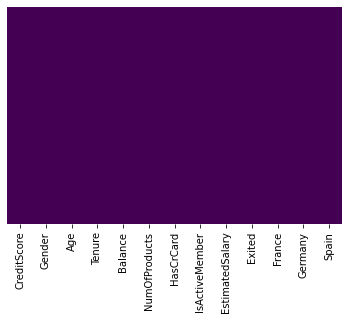

In [11]:
#Checking for null value because null values reduces accuracy
sns.heatmap(final.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Machine learns better if values are between 0 and 1.

In [20]:
cols_to_scale = ['CreditScore','Age','Tenure','Balance','EstimatedSalary','NumOfProducts']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
final[cols_to_scale] = scaler.fit_transform(final[cols_to_scale])

In [21]:
final.head(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
0,0.538,1,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,1,0,0
1,0.516,1,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0,0,1
2,0.304,1,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,1,0,0
3,0.698,1,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,1,0,0
4,1.000,1,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,0,0,1


In [22]:
X = final.drop('Exited',axis='columns')
y = final['Exited']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [23]:
X_train[:5]

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain
7751,0.800,1,0.283784,0.6,0.000000,0.333333,0,0,0.096273,0,0,1
4154,0.752,0,0.216216,0.3,0.000000,0.333333,1,0,0.981478,1,0,0
3881,0.476,1,0.621622,0.3,0.000000,0.000000,1,1,0.948551,1,0,0
9238,0.846,1,0.432432,0.4,0.000000,0.333333,1,0,0.646869,1,0,0
5210,0.402,0,0.229730,0.7,0.517012,0.333333,0,0,0.434670,1,0,0


In [24]:
len(X_train.columns)

12

In [25]:

import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(12,), activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])



model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4763 - accuracy: 0.7952
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4349 - accuracy: 0.8156
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4127 - accuracy: 0.8265
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3922 - accuracy: 0.8359
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3642 - accuracy: 0.8509
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3509 - accuracy: 0.8528
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3441 - accuracy: 0.8569
Epoch 8/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3435 - accuracy: 0.8593
Epoch 9/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3381 - accuracy: 0.8604
Epoch 10/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3358 - accura

In [26]:
model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 1ms/step - loss: 0.4075 - accuracy: 0.8385


[0.40746942162513733, 0.8385000228881836]

In [27]:
yp = model.predict(X_test)
yp[:5]

array([[0.06016377],
       [0.02088082],
       [0.00962058],
       [0.12334576],
       [0.02018192]], dtype=float32)

In [28]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [29]:
y_pred[:5]

[0, 0, 0, 0, 0]

In [30]:
y_test[:5]

7054    0
442     0
3954    0
2288    0
3196    0
Name: Exited, dtype: int64

In [31]:
from sklearn.metrics import confusion_matrix , classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      1595
           1       0.65      0.45      0.53       405

    accuracy                           0.84      2000
   macro avg       0.76      0.69      0.72      2000
weighted avg       0.82      0.84      0.83      2000



Text(69.0, 0.5, 'Truth')

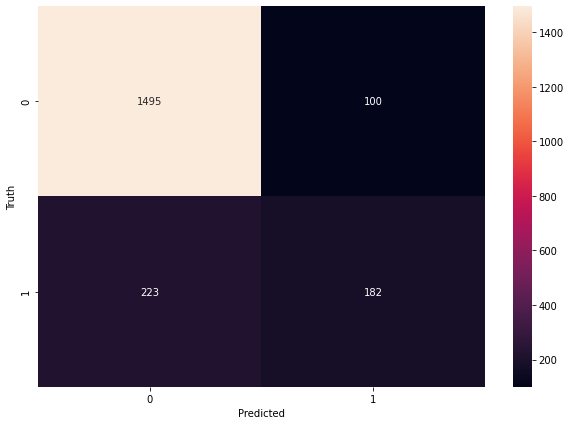

In [32]:

import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')